# Credit Card Fraud Detection:

Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or
legitimate.

# Import necessary libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset

In [86]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")

# Combine train and test datasets

In [87]:
data = pd.concat([train, test])

# Display basic statistics of the dataset

In [88]:
print(data.describe())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

# Display the shape of the train and test datasets

In [89]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


# Display the first few rows of the dataset

In [90]:
display(data.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Check for missing values

In [91]:
print(data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


# Convert categorical variables to numerical using Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le
    
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

# Convert date columns to datetime and extract relevant features

In [93]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

# Convert date columns to datetime and extract relevant features for the train dataset

In [94]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])
train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour
train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day
train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

# Convert date columns to datetime and extract relevant features for the test dataset

In [95]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])
test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day
test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

# Drop unnecessary columns

In [96]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

# Display shapes of the datasets after preprocessing

In [97]:
print(f"Train Shape after Preprocessing: {train.shape}")
print(f"Test Shape after Preprocessing: {test.shape}")
print(f"Combined Data Shape after Preprocessing: {data.shape}")


Train Shape after Preprocessing: (1296675, 23)
Test Shape after Preprocessing: (555719, 23)
Combined Data Shape after Preprocessing: (1852394, 23)


# Display basic information about the dataset

In [98]:
print("Head of Data:")
print(data.head(0))
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())
print("\nMissing Values after Preprocessing:")
print(data.isnull().sum())

Head of Data:
Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  36.011293  -82.048315         0   
1  99160  48.8878 -118.2105  ...  49.159047 -118.186462         0   
2  83252

# Visualize the distribution of fraudulent vs non-fraudulent transactions

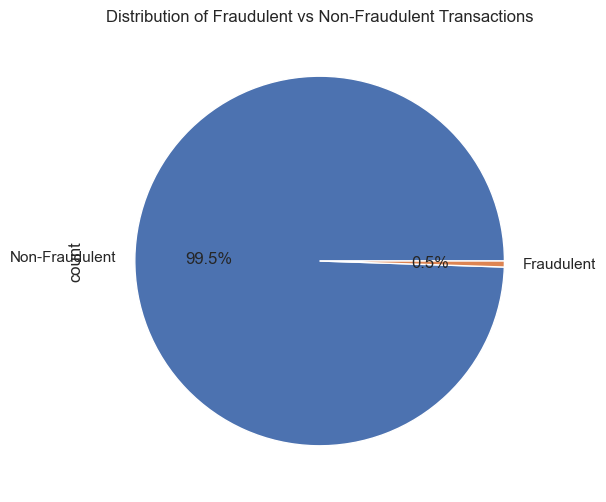

In [99]:
plt.figure(figsize=(8, 6))
data['is_fraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Check for and remove duplicated indices

In [100]:
print("Duplicated Indices before Resetting:")
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print("Duplicated Indices after Resetting:")
print(data.index.duplicated().sum())

Duplicated Indices before Resetting:
555719
Duplicated Indices after Resetting:
0


# Visualize transaction counts by category and fraud status

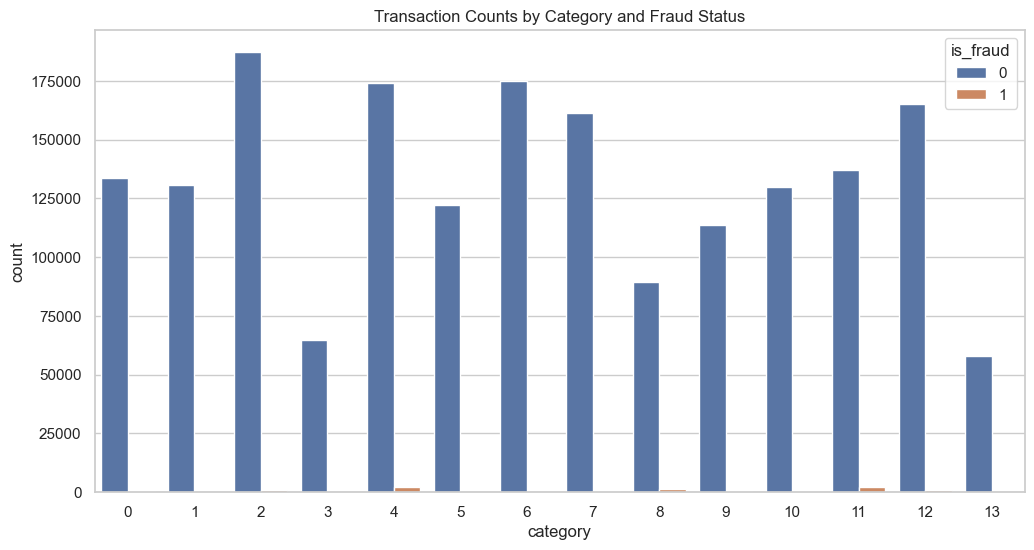

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

# Visualize transaction counts by gender and fraud status

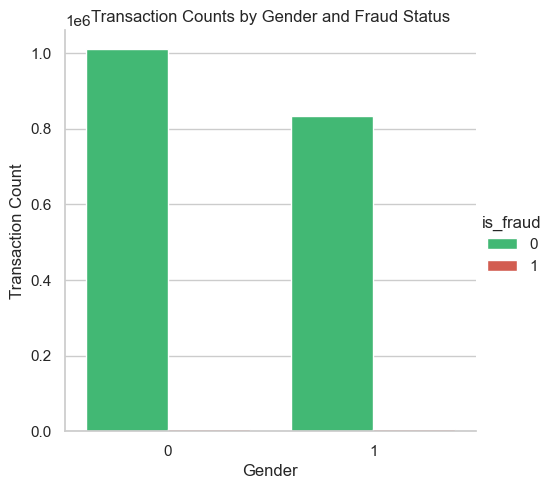

In [102]:
sns.catplot(data=data, x='gender', hue='is_fraud', kind='count', palette=['#2ecc71', '#e74c3c'])
plt.title('Transaction Counts by Gender and Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.show()

# Display the correlation heatmap

<Figure size 2000x1000 with 0 Axes>

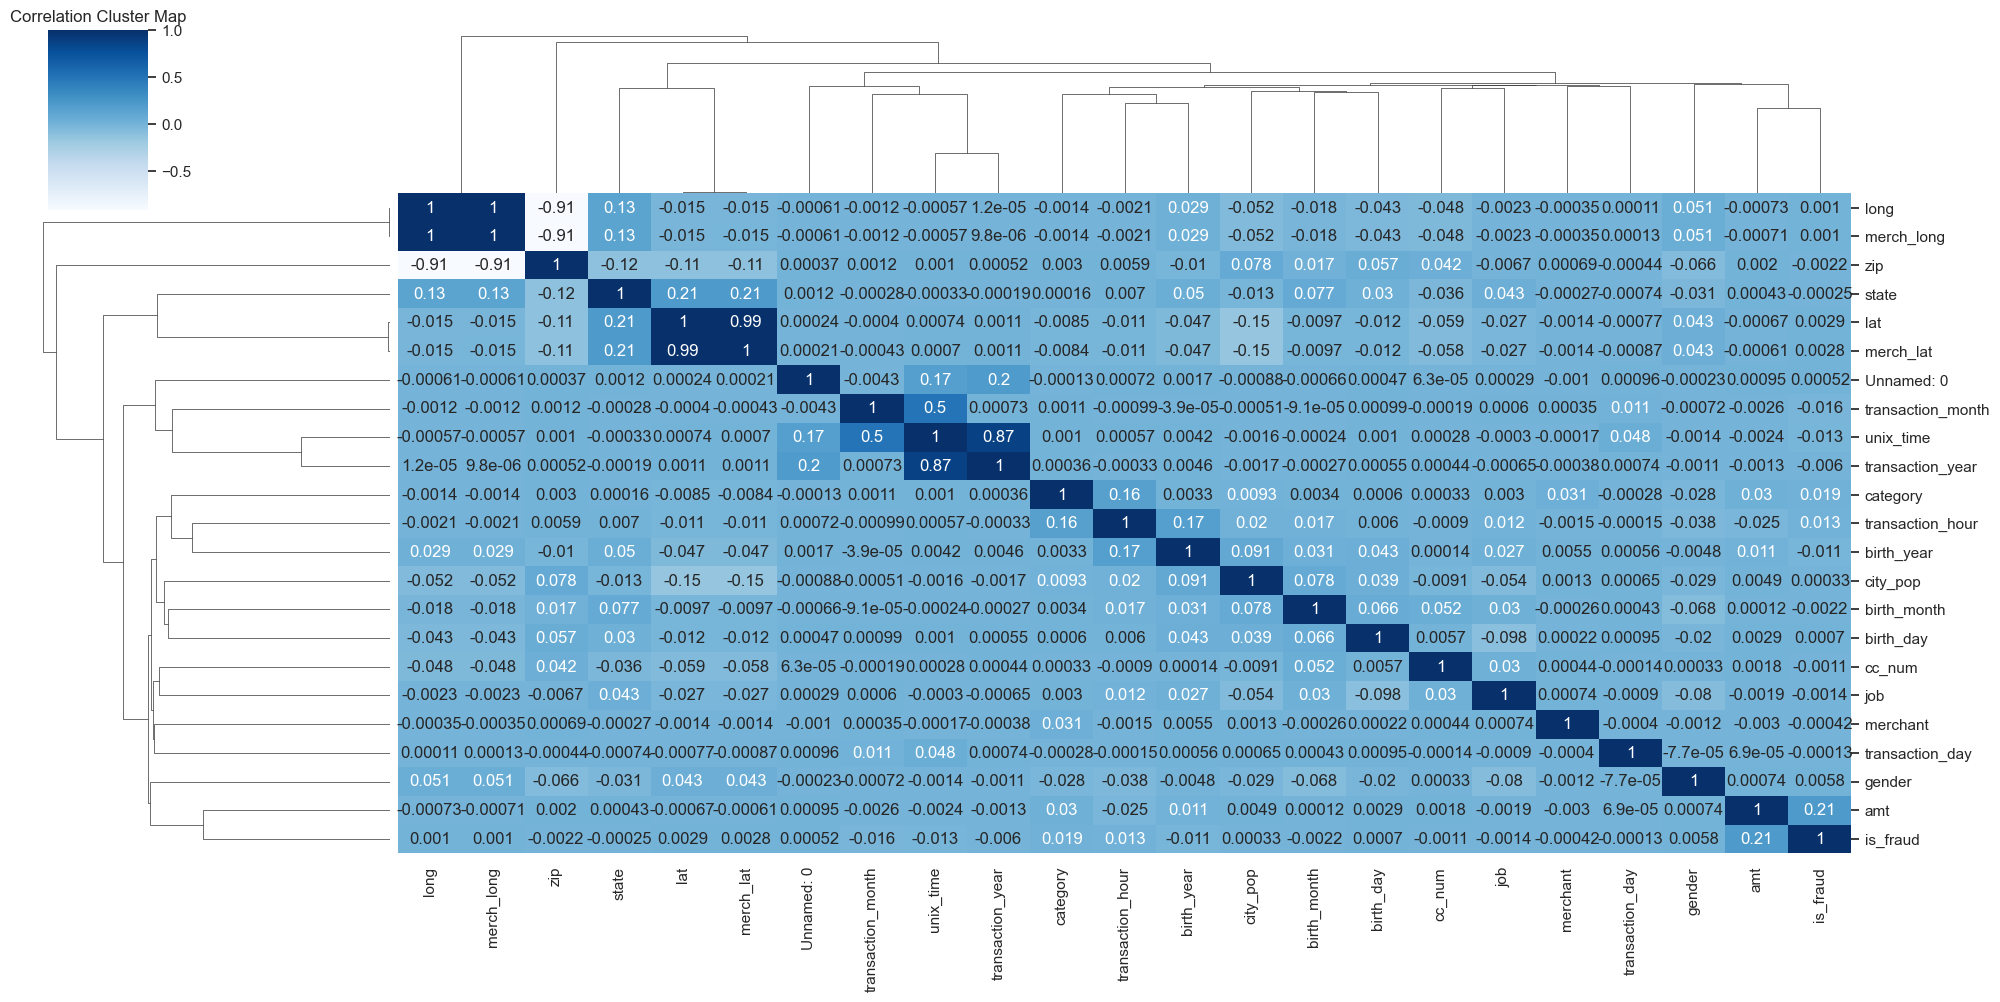

In [103]:
plt.figure(figsize=(20, 10))

# Create a cluster map
sns.clustermap(data.corr(), annot=True, cmap='Blues', figsize=(20, 10))

plt.title('Correlation Cluster Map')
plt.show()

# Split the data into features (X) and target variable (y)

In [104]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the data into training and testing sets

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression

In [106]:
log_model = LogisticRegression(max_iter=1000)

# Training the Logistic Regression model

In [107]:
log_model.fit(X_train, y_train)

C:\Users\hp\ML\CodSoft\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Make predictions on the test set using Logistic Regression

In [108]:
y_pred_log = log_model.predict(X_test)

# Evaluate the Logistic Regression model

In [109]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nAccuracy Score:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression:


C:\Users\hp\ML\CodSoft\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\ML\CodSoft\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479


Confusion Matrix:
[[368526      0]
 [  1953      0]]

Accuracy Score:
Accuracy: 0.9947284461467452


C:\Users\hp\ML\CodSoft\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 2: Decision Tree

In [110]:
dt_model = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model

In [111]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Make predictions on the test set using Decision Tree

In [112]:
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model

In [113]:
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nAccuracy Score:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.80      0.84      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
[[368104    422]
 [   305   1648]]

Accuracy Score:
Accuracy: 0.9980376755497613


# Model 3: Random Forest

In [114]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model

In [115]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions on the test set using Random Forest

In [116]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model

In [117]:
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nAccuracy Score:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.98      0.75      0.85      1953

    accuracy                           1.00    370479
   macro avg       0.99      0.87      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
[[368502     24]
 [   497   1456]]

Accuracy Score:
Accuracy: 0.9985937124641343


# Model names and predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_14876\2840245081.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=[accuracy_score(y_test, y_pred) for y_pred in y_preds], palette="viridis")


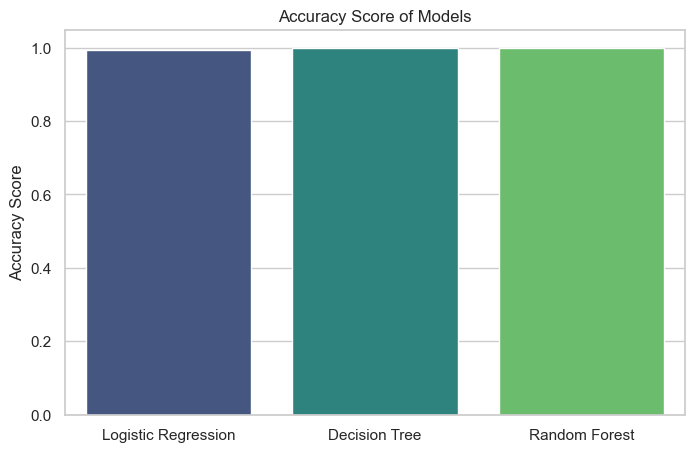

In [118]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_log, y_pred_dt, y_pred_rf]

# Accuracy scores and plot
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=[accuracy_score(y_test, y_pred) for y_pred in y_preds], palette="viridis")
plt.title('Accuracy Score of Models')
plt.ylabel('Accuracy Score')
plt.show()